In [1]:
from scipy.spatial.distance import hamming
import editdistance

import pandas as pd
import seaborn as sns

from metrics.topographic_similarity import TopographicSimilarity
from metrics.context_independence import ContextIndependence
from metrics.tre import TreeReconstructionError, LinearComposition, AdditiveComposition, MLPComposition
from protocols import get_trivially_compositional_protocol, get_random_protocol, \
    get_nontrivially_compositional_protocol, get_holistic_protocol


NUM_COLORS = NUM_SHAPES = 5
df = pd.DataFrame(columns=['protocol', 'metric', 'value', 'seed'])

for seed in range(1):
    protocols = {
    'holistic': (get_holistic_protocol(NUM_COLORS, NUM_SHAPES), 2),
    'trivially compositional': (get_trivially_compositional_protocol(NUM_COLORS, NUM_SHAPES), 2),
    'random': (get_random_protocol(NUM_COLORS, NUM_SHAPES), 2),
    'baroni\'s protocol': (get_nontrivially_compositional_protocol(NUM_COLORS, NUM_SHAPES), 2),
    # 'negation': (negation_protocol, 4)
    }
    for name, (protocol, length) in protocols.items():
        print(name)

        ci = ContextIndependence(NUM_COLORS, NUM_SHAPES)
        ci_value = ci.measure(protocol)
        # print(f'ci = {ci_value:.4f}')
        df.loc[len(df)] = [name, 'context independence', ci_value, seed]

        topo = TopographicSimilarity(
            input_metric=hamming,
            messages_metric=editdistance.eval
        )
        topo_value = topo.measure(protocol)
        # print(f'topo = {topo_value:.4f}')
        df.loc[len(df)] = [name, 'topographical similarity', abs(topo_value), seed]

        tre1 = TreeReconstructionError(NUM_COLORS, NUM_SHAPES, length, LinearComposition)
        tre1_value = tre1.measure(protocol)
        # print(f'tre = {tre_value:.4f}')
        df.loc[len(df)] = [name, 'TRE with linear composition', -tre1_value, seed]

        tre2 = TreeReconstructionError(NUM_COLORS, NUM_SHAPES, length, AdditiveComposition)
        tre2_value = tre2.measure(protocol)
        # print(f'tre = {tre_value:.4f}')
        df.loc[len(df)] = [name, 'TRE with additive composition', -tre2_value, seed]

        tre3 = TreeReconstructionError(NUM_COLORS, NUM_SHAPES, length, MLPComposition)
        tre3_value = tre3.measure(protocol)
        # print(f'tre = {tre_value:.4f}')
        df.loc[len(df)] = [name, 'TRE with non-linear composition', -tre3_value, seed]



df

holistic
trivially compositional
random
baroni's protocol


,protocol,metric,value,seed
0,holistic,context independence,0.064667,0
1,holistic,topographical similarity,0.057864,0
2,holistic,TRE with linear composition,-5.156075,0
3,holistic,TRE with additive composition,-8.045818,0
4,holistic,TRE with non-linear composition,-0.018142,0
5,trivially compositional,context independence,0.250000,0
6,trivially compositional,topographical similarity,1.000000,0
7,trivially compositional,TRE with linear composition,-0.010246,0
8,trivially compositional,TRE with additive composition,-0.235396,0
9,trivially compositional,TRE with non-linear composition,-0.007506,0


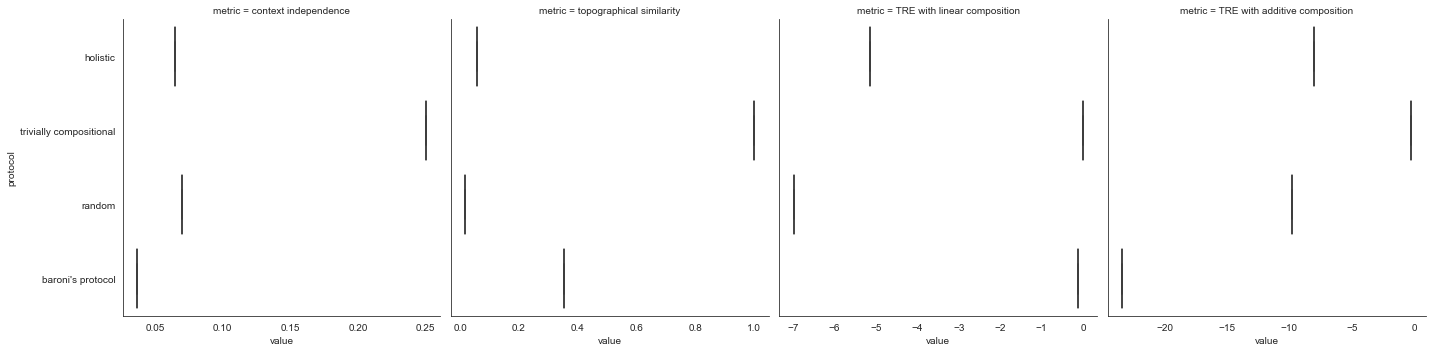

In [2]:
sns.set_style("white")
without_nonlinear = df[df['metric'] != 'TRE with non-linear composition']
sns.catplot(x='value', y='protocol', col='metric', data=without_nonlinear, kind='box', sharex=False)

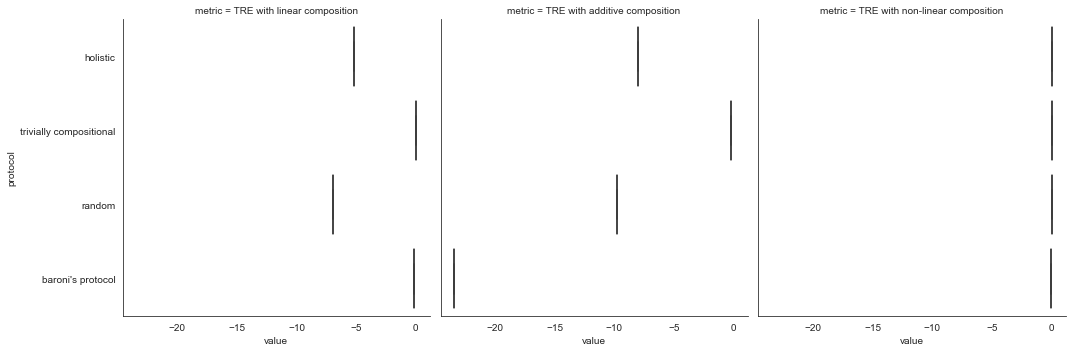

In [3]:
all_tre = df[df['metric'].str.contains('TRE')]
sns.catplot(x='value', y='protocol', col='metric', data=all_tre, kind='box', sharex=True)